In [1]:
from backdoor.dataset import CIFAR10

In [2]:
from backdoor.handcrafted import FilterOptimizer

In [3]:
from torch import nn

In [4]:
from backdoor.badnet import Trigger

In [5]:
trigger = Trigger.checkerboard('bottomleft', (3, 3), padding=1, colours=(255, 0))

-4 1


In [6]:
import matplotlib.pyplot as plt
from backdoor.image_utils import ImageFormat

def plot_image(img, file=False, axes=False, minmax=None):
    if minmax:
        plt.imshow(np.moveaxis(tonp(img), -3, -1), vmin=minmax[0], vmax=minmax[1])
    else:
        plt.imshow(ImageFormat.scikit(img))
    if not axes:
        plt.axis('off')
    if file:
        plt.savefig(file, bbox_inches='tight')
    plt.show()

In [7]:
import numpy as np

ds = CIFAR10().get_data()

X = ds['train'].X[:256]
X_t = np.array([trigger(x) for x in ds['train'].X[:256]])

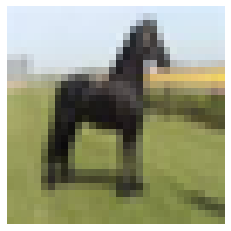

In [8]:
image_i = 172
# for i in range(200):
#     print(i)
#     plot_image(X[i])
plot_image(X[image_i], file='filteroptimizer_img1.svg')

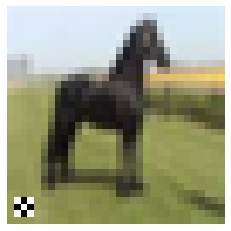

In [9]:
plot_image(X_t[image_i], file='filteroptimizer_img1t.svg')

In [10]:
from backdoor.utils import totensor

plot_image(conv(totensor(ImageFormat.torch(X), device='cuda'))[0])

NameError: name 'conv' is not defined

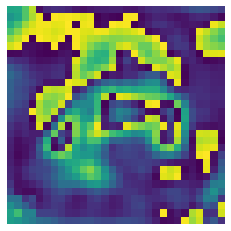

In [56]:
plot_image(conv(totensor(ImageFormat.torch(X_t), device='cuda'))[0])

In [40]:
conv(totensor(ImageFormat.torch(X), device='cuda'))[0].mean()

tensor(-0.5768, device='cuda:0', grad_fn=<MeanBackward0>)

In [42]:
conv.weight

tensor([[[[0.0503, 0.0486, 0.0527],
          [0.0552, 0.0528, 0.0491],
          [0.0585, 0.0572, 0.0583]],

         [[0.0642, 0.0747, 0.0709],
          [0.0705, 0.0751, 0.0724],
          [0.0693, 0.0757, 0.0706]],

         [[0.1395, 0.1353, 0.1381],
          [0.1451, 0.1465, 0.1431],
          [0.1475, 0.1447, 0.1472]]]], device='cuda:0',
       grad_fn=<WeightNormCudaInterfaceBackward>)

In [79]:
conv = nn.Conv2d(3, 1, 3)
conv.weight.data = totensor(np.expand_dims(np.repeat(np.expand_dims(np.array([[1, -1, 1], [-1, 1, -1], [1, -1, 1]]), 0), 3, 0), 0))

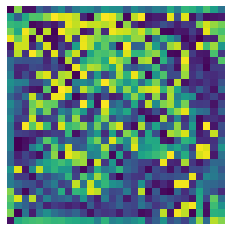

In [83]:
plot_image(conv(totensor(ImageFormat.torch(X_t)))[0])

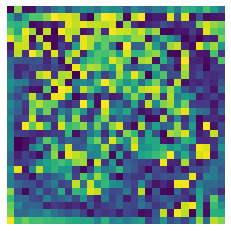

In [84]:
plot_image(conv(totensor(ImageFormat.torch(X)))[0]).

In [80]:
conv.weight.shape

torch.Size([1, 3, 3, 3])

In [89]:
conv(totensor(ImageFormat.torch(X_t))).max() - conv(totensor(ImageFormat.torch(X))).max()

tensor(21.6078, grad_fn=<SubBackward0>)

In [97]:
import torch
def myrelu(x):
    return torch.nn.functional.relu(x - 22)
#     return torch.max(0, x - 22)

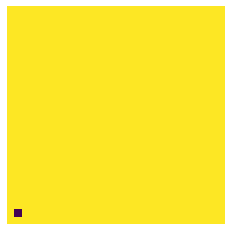

In [98]:
plot_image(myrelu(conv(totensor(ImageFormat.torch(X_t)))[0]))

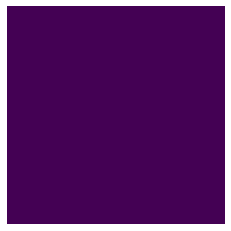

In [99]:
plot_image(myrelu(conv(totensor(ImageFormat.torch(X)))[0]))

In [11]:
conv = nn.Conv2d(3, 1, 3)

conv = nn.utils.weight_norm(conv)
conv.weight_g.requires_grad = False

model = nn.Sequential(
    conv,
    nn.ReLU(),
    nn.MaxPool2d(2),
)

fo = FilterOptimizer(model)

In [12]:
losses = fo.optimize(X, X_t)

tensor(0.0010, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0004, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0002, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0009, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0017, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0026, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0035, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0044, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0054, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0064, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0074, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0084, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0095, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0106, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0117, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0128, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0139, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0149, 

tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0630

tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0632

tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634

tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0634, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635

tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(-0.0635

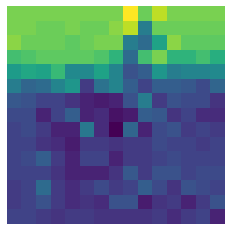

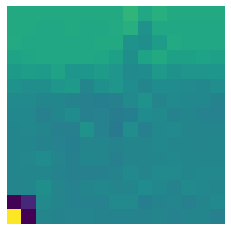

In [193]:
plot_image(model(totensor(ImageFormat.torch(X), device='cuda'))[image_i])
plot_image(model(totensor(ImageFormat.torch(X_t), device='cuda'))[image_i])

In [190]:
t_

tensor(1., device='cuda:0')

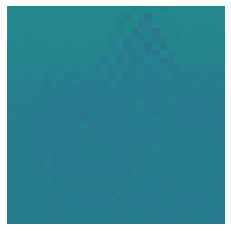

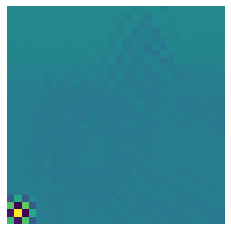

In [39]:
t_pred = conv(totensor(ImageFormat.torch(X_t), device='cuda'))[image_i]
xmin, xmax = t_pred.min(), t_pred.max()

plot_image(conv(totensor(ImageFormat.torch(X), device='cuda'))[image_i], minmax=(xmin, xmax), file='filteroptimiser_img2.svg')
plot_image(t_pred, minmax=(xmin,xmax), file='filteroptimiser_img2t.svg')

In [13]:
t_pred.max()

NameError: name 't_pred' is not defined

In [209]:
conv.weight

tensor([[[[ 0.0747, -0.0925,  0.0376],
          [-0.1324,  0.1666, -0.0914],
          [ 0.0777, -0.1332,  0.0756]],

         [[ 0.0753, -0.0917,  0.0382],
          [-0.1313,  0.1688, -0.0901],
          [ 0.0791, -0.1311,  0.0778]],

         [[ 0.0925, -0.0751,  0.0504],
          [-0.1093,  0.1949, -0.0732],
          [ 0.0969, -0.1090,  0.0956]]]], device='cuda:0',
       grad_fn=<WeightNormCudaInterfaceBackward>)

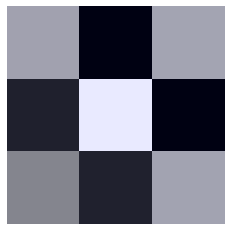

In [30]:
from backdoor.utils import tonp
# w =
w = tonp(conv.weight[0])
w -= w.min()
w /= w.max()
w = np.swapaxes(w, 0, 2)
# print(w.min(), w.max())
plt.axis('off')
# plt.title('Learned CONFilter')

plt.imshow(w)
plt.savefig('filter.svg',bbox_inches='tight')

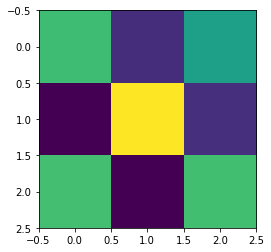

In [125]:
plt.imshow(w[1])

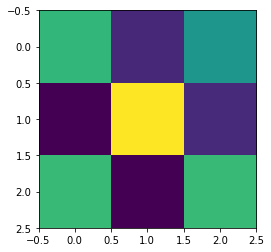

In [126]:
plt.imshow(w[2])

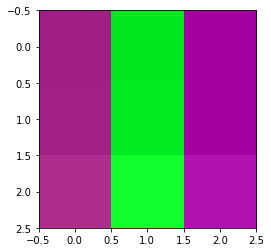

In [127]:
plt.imshow(w)

In [128]:
ImageFormat.scikit(w)

array([[[1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]],

       [[1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]],

       [[1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]]], dtype=uint8)

In [129]:
w.shape

(3, 3, 3)

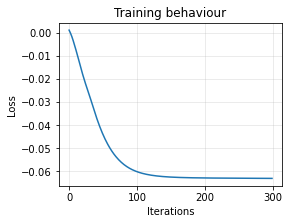

In [50]:
plt.figure(figsize=(4, 3))
plt.plot(np.array(losses[:300]))
plt.xlabel('Iterations')
plt.xticks([0, 100, 200, 300])
plt.ylabel('Loss')
plt.title('Training behaviour')
plt.grid(alpha=0.3)
plt.savefig('filteroptimiser-b.pdf', bbox_inches='tight')